# Visualize TEMPO and GEMS output 

## Part 1 - plot selected region (portland, OR)

In [1]:
import os
from pandas import read_csv
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import shapely.wkt
import geopandas as gpd
import contextily as cx
import matplotlib
import warnings
from  matplotlib.ticker import PercentFormatter
from pygris import states
# from rasterio.crs import CRS
warnings.filterwarnings("ignore")
#work directory is where the I-O data are stored
work_dir = '/Users/xiaodanxu/Library/CloudStorage/GoogleDrive-arielinseu@gmail.com/My Drive/GEMS/BILD-AQ/deliverables'
os.chdir(work_dir)

plt.style.use('ggplot')
sns.set(font_scale=1.2)  # larger font

Using the default year of 2021


<Axes: >

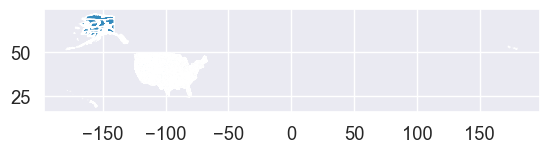

In [2]:
# prepare input and parameters
selected_states = ['OR']
dac_designation = read_csv('Network/Joint_office_DAC_lookup.csv')

state_id_file = 'Network/ccst_geoid_key_transp_geo_with_imputation.csv'
state_id_lookup = read_csv(state_id_file)

land_area_file = 'Network/combined_tract_land_area.csv'
land_area = read_csv(land_area_file)
# generate map visualization
us_tract_file = 'Network/census_tracts_2017.geojson'
us_tracts_geojson =  gpd.read_file(us_tract_file) # load shapefile of CA tracts
us_tracts_geojson.loc[:, 'home_GEOID'] = us_tracts_geojson.loc[:, 'GEOID'].astype(int)
# CA_tracts_geojson.loc[:, 'home_GEOID'] = CA_tracts_geojson.loc[:, 'GEOID'].astype(str).str.zfill(0)
#CA_tracts_geojson.head(5)
us_states = states()
us_tracts_geojson.plot()

In [40]:
#plot micro-geotype
pnw_microtype = state_id_lookup.loc[state_id_lookup['st_code'].isin(['CA', 'OR', 'WA'])]
# pnw_microtype.head(5)
us_tracts_geojson.loc[:, 'GEOID'] = us_tracts_geojson.loc[:, 'GEOID'].astype(int)
us_tracts_geojson_pnw = us_tracts_geojson.merge(pnw_microtype, on = 'GEOID', how = 'inner')
print(len(us_tracts_geojson_pnw))
us_tracts_geojson_pnw = us_tracts_geojson_pnw.to_crs(epsg = 3857)
us_tracts_geojson_pnw.head(5)

10320


,GEOID,NAME,geometry,home_GEOID,FID,MicrotypeID,microtype,microtype_imp,fips_st,st_code,state,cty,ctyname,cbsa,cbsaname,spatial_id,geotype,geotype_imp
0,6001400100,"Census Tract 4001, Alameda County, California","MULTIPOLYGON (((-13608464.932 4563254.854, -13...",6001400100,3504,A_5,5,False,6,CA,California,6001,"Alameda County, CA",41860,"San Francisco-Oakland-Hayward, CA",41860,A,False
1,6001400200,"Census Tract 4002, Alameda County, California","MULTIPOLYGON (((-13609633.579 4557284.385, -13...",6001400200,1137,A_2,2,False,6,CA,California,6001,"Alameda County, CA",41860,"San Francisco-Oakland-Hayward, CA",41860,A,False
2,6001400300,"Census Tract 4003, Alameda County, California","MULTIPOLYGON (((-13610384.543 4556847.542, -13...",6001400300,2150,A_3,3,False,6,CA,California,6001,"Alameda County, CA",41860,"San Francisco-Oakland-Hayward, CA",41860,A,False
3,6001400400,"Census Tract 4004, Alameda County, California","MULTIPOLYGON (((-13610121.939 4557100.286, -13...",6001400400,290,A_1,1,False,6,CA,California,6001,"Alameda County, CA",41860,"San Francisco-Oakland-Hayward, CA",41860,A,False
4,6001400500,"Census Tract 4005, Alameda County, California","MULTIPOLYGON (((-13610968.411 4557990.786, -13...",6001400500,290,A_1,1,False,6,CA,California,6001,"Alameda County, CA",41860,"San Francisco-Oakland-Hayward, CA",41860,A,False


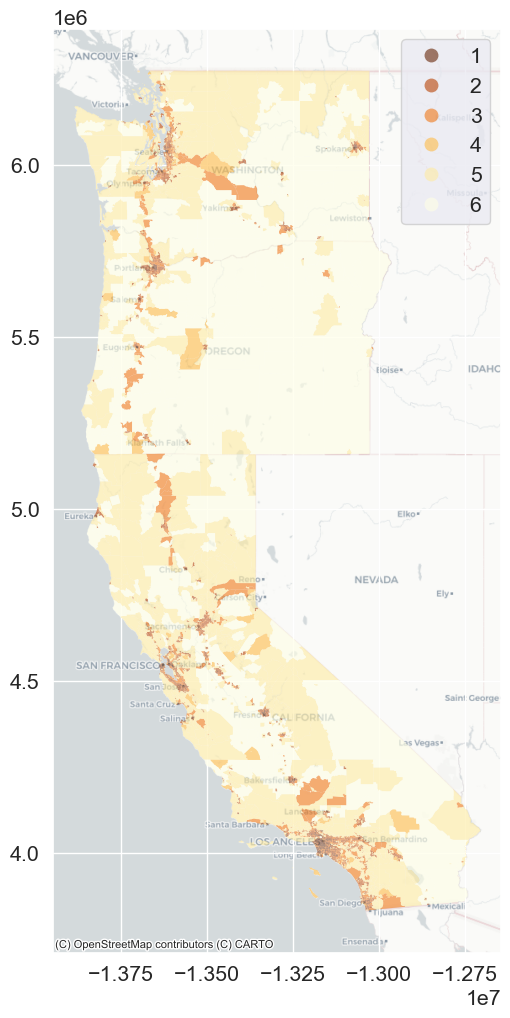

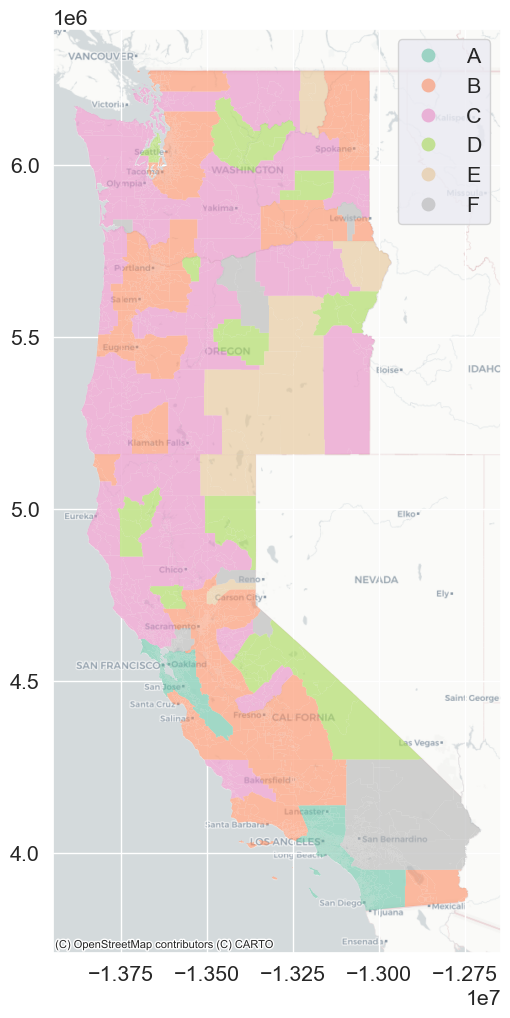

In [47]:
# plotting
us_tracts_geojson_pnw['microtype'] = \
us_tracts_geojson_pnw['microtype'].astype(str)
ax = us_tracts_geojson_pnw.plot(figsize = (10,12), 
                           column = 'microtype', 
                           cmap='YlOrBr_r',
                            alpha = 0.6, 
                              linewidth=0.01, legend=True)
# tracts_with_EV_diff.plot(ax = ax, facecolor = "none", 
#                          edgecolor='navy', lw=0.03)
cx.add_basemap(ax, source = cx.providers.CartoDB.Positron)
plt.savefig('Plot/report/region_microtype.png', dpi = 200)

ax = us_tracts_geojson_pnw.plot(figsize = (10,12), 
                           column = 'geotype', 
                           cmap='Set2',
                            alpha = 0.6, 
                              linewidth=0.01, legend=True)
# tracts_with_EV_diff.plot(ax = ax, facecolor = "none", 
#                          edgecolor='navy', lw=0.03)
cx.add_basemap(ax, source = cx.providers.CartoDB.Positron)
plt.savefig('Plot/report/region_geotype.png', dpi = 200)

<Axes: >

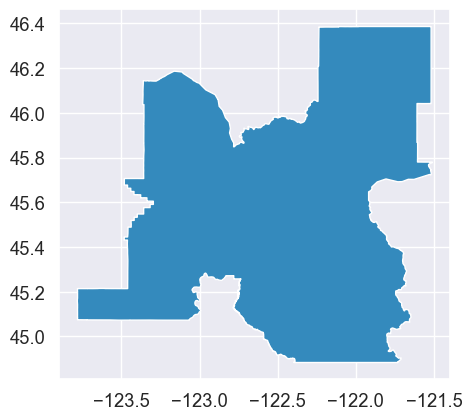

In [3]:
# CBSA
CBSA_boundary = core_based_statistical_areas(year = 2018)
# CBSA_boundary.head(5)
portland_boundary = CBSA_boundary.loc[CBSA_boundary['GEOID'] == '38900'] 
portland_boundary.plot()

In [4]:
EV_VMT_by_scenario = None
for selected_state in selected_states:
    EV_penetration_dir = 'Input/' + selected_state

    file_name = 'BILDAQ_VMT_by_tract_multistate_spillover.csv'
    ev_vmt = read_csv(EV_penetration_dir + '/' + file_name)
#         ev_vmt.loc[:, 'state'] = selected_state
    EV_VMT_by_scenario = pd.concat([EV_VMT_by_scenario, ev_vmt])
#     break
print(len(EV_VMT_by_scenario))
EV_VMT_by_scenario.head(5)    

1418135


,thru_GEOID,thru_geotype,thru_microtype,home_GEOID,home_geotype,home_microtype,populationGroupType,State,VMT
0,6015000102,B,5.0,41015950400,B,6,medium-income,OR,2.780820
1,6015000201,B,6.0,41015950400,B,6,medium-income,OR,2.069624
2,6015000202,B,5.0,41015950400,B,6,medium-income,OR,2.286347
3,6015000203,B,6.0,41015950400,B,6,medium-income,OR,5.746862
4,6023001200,C,5.0,41015950400,B,6,medium-income,OR,1.830355


<Axes: >

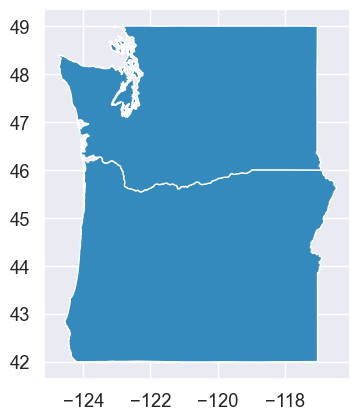

In [5]:
us_states.head(5)
state_boundary = us_states.loc[us_states['STUSPS'].isin(['OR', 'WA'])]
state_boundary.plot()

In [6]:
# land_area.head(5)
land_area = land_area.rename(columns = {'GEOID': 'home_GEOID'})
us_tracts_geojson = us_tracts_geojson.merge(land_area, 
                                           on = 'home_GEOID',
                                           how = 'left')
us_tracts_geojson.head(5)

,GEOID,NAME,geometry,home_GEOID,ALAND,AWATER
0,01001020100,"Census Tract 201, Autauga County, Alabama","MULTIPOLYGON (((-86.50916 32.47344, -86.50620 ...",1001020100,9817812,28435
1,01001020200,"Census Tract 202, Autauga County, Alabama","MULTIPOLYGON (((-86.48093 32.48154, -86.47945 ...",1001020200,3325679,5670
2,01001020300,"Census Tract 203, Autauga County, Alabama","MULTIPOLYGON (((-86.47087 32.47573, -86.46964 ...",1001020300,5349273,9054
3,01001020400,"Census Tract 204, Autauga County, Alabama","MULTIPOLYGON (((-86.45394 32.49318, -86.44742 ...",1001020400,6384276,8408
4,01001020500,"Census Tract 205, Autauga County, Alabama","MULTIPOLYGON (((-86.43816 32.45069, -86.43773 ...",1001020500,11408873,43534


In [7]:
# append state and cbsa

# state_lookup = state_id_lookup[['GEOID', 'st_code', 'cbsa']]
EV_VMT_by_scenario = pd.merge(EV_VMT_by_scenario, state_id_lookup,
                             left_on = 'home_GEOID', right_on = 'GEOID', how = 'left')

EV_VMT_by_scenario = EV_VMT_by_scenario.drop(columns = 'GEOID')
# EV_VMT_by_scenario = EV_VMT_by_scenario.rename(columns = {'st_code':'state'})
print(len(EV_VMT_by_scenario))
EV_VMT_by_scenario.head(5)

1418135


,thru_GEOID,thru_geotype,thru_microtype,home_GEOID,home_geotype,home_microtype,populationGroupType,State,VMT,FID,...,fips_st,st_code,state,cty,ctyname,cbsa,cbsaname,spatial_id,geotype,geotype_imp
0,6015000102,B,5.0,41015950400,B,6,medium-income,OR,2.780820,11528,...,41,OR,Oregon,41015,"Curry County, OR",15060,"Brookings, OR",15060,C,False
1,6015000201,B,6.0,41015950400,B,6,medium-income,OR,2.069624,11528,...,41,OR,Oregon,41015,"Curry County, OR",15060,"Brookings, OR",15060,C,False
2,6015000202,B,5.0,41015950400,B,6,medium-income,OR,2.286347,11528,...,41,OR,Oregon,41015,"Curry County, OR",15060,"Brookings, OR",15060,C,False
3,6015000203,B,6.0,41015950400,B,6,medium-income,OR,5.746862,11528,...,41,OR,Oregon,41015,"Curry County, OR",15060,"Brookings, OR",15060,C,False
4,6023001200,C,5.0,41015950400,B,6,medium-income,OR,1.830355,11528,...,41,OR,Oregon,41015,"Curry County, OR",15060,"Brookings, OR",15060,C,False


In [8]:
selected_region = 38900 # ,Portland, OR
EV_VMT_by_scenario_portland = \
EV_VMT_by_scenario.loc[EV_VMT_by_scenario['cbsa'] == selected_region]
print(len(EV_VMT_by_scenario_portland))

907784


In [9]:
# EV_VMT_by_scenario_portland.columns
group_var_h = ['home_GEOID']
EV_VMT_by_home_portland = \
EV_VMT_by_scenario_portland.groupby(group_var_h)[['VMT']].sum()
EV_VMT_by_home_portland = EV_VMT_by_home_portland.reset_index()
print(len(EV_VMT_by_home_portland))
EV_VMT_by_home_portland.head(5)

382


,home_GEOID,VMT
0,41005020100,55641.837460
1,41005020200,110976.264458
2,41005020302,64867.561540
3,41005020303,70606.068798
4,41005020304,84720.740618


In [10]:
us_tracts_geojson = us_tracts_geojson.to_crs(epsg=3857)
us_tracts_geojson.head(5)
state_boundary = state_boundary.to_crs(epsg = 3857)
portland_boundary = portland_boundary.to_crs(epsg = 3857)

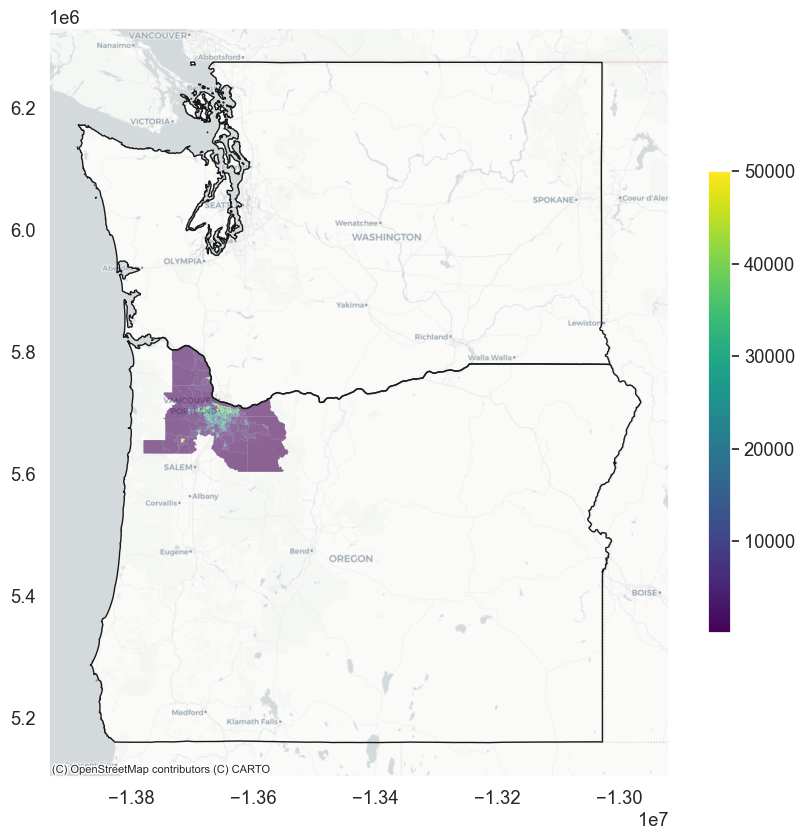

In [11]:
# plot EV penetration change under aggresive scenario
# state_tracts_geojson = \
# us_tracts_geojson.loc[us_tracts_geojson['st_code'] == selected_state]

home_vmt_to_plot = us_tracts_geojson.merge(EV_VMT_by_home_portland, 
                                            on = 'home_GEOID',
                                            how = 'inner')
home_vmt_to_plot.loc[:, 'VMT_per_sqkm'] =  \
home_vmt_to_plot.loc[:, 'VMT']/ home_vmt_to_plot.loc[:, 'ALAND'] * (10**6)
# tracts_with_EV_diff.loc[:, 'EV_fraction_diff'] *= 100
ax = home_vmt_to_plot.plot(figsize = (10,12), 
                           column = 'VMT_per_sqkm', 
                           cmap='viridis',
                            alpha = 0.6, 
                           vmin = 1, vmax = 50000, 
                              linewidth=0.01, legend=True,
                                legend_kwds = {'shrink': 0.5})
# tracts_with_EV_diff.plot(ax = ax, facecolor = "none", 
#                          edgecolor='navy', lw=0.03)
state_boundary.plot(ax = ax, facecolor='none', edgecolor='k',linewidth = 1)
cx.add_basemap(ax, source = cx.providers.CartoDB.Positron)
# cx.add_basemap(ax, crs = tracts_with_EV_diff.crs.to_string(),
#                source = cx.providers.Stamen.TonerLite)
# cx.add_basemap(ax, crs = 'EPSG:4326', zoom =8,
#                source = cx.providers.Stamen.TonerLite)
ax.grid(False)
plt.savefig('Plot/report/vmt_by_home_portland.png', dpi = 200)

In [12]:
group_var_t = ['thru_GEOID']
EV_VMT_by_path_portland = \
EV_VMT_by_scenario_portland.groupby(group_var_t)[['VMT']].sum()
# EV_VMT_by_path_portland = \
# EV_VMT_by_path_portland.loc[EV_VMT_by_path_portland['VMT']>1]
EV_VMT_by_path_portland = EV_VMT_by_path_portland.reset_index()
print(len(EV_VMT_by_path_portland))
EV_VMT_by_path_portland.head(5)

1835


,thru_GEOID,VMT
0,16001002100,5.394193
1,16001002224,2.697096
2,16001010100,5.394193
3,16001010225,2.697096
4,16001010313,10.788386


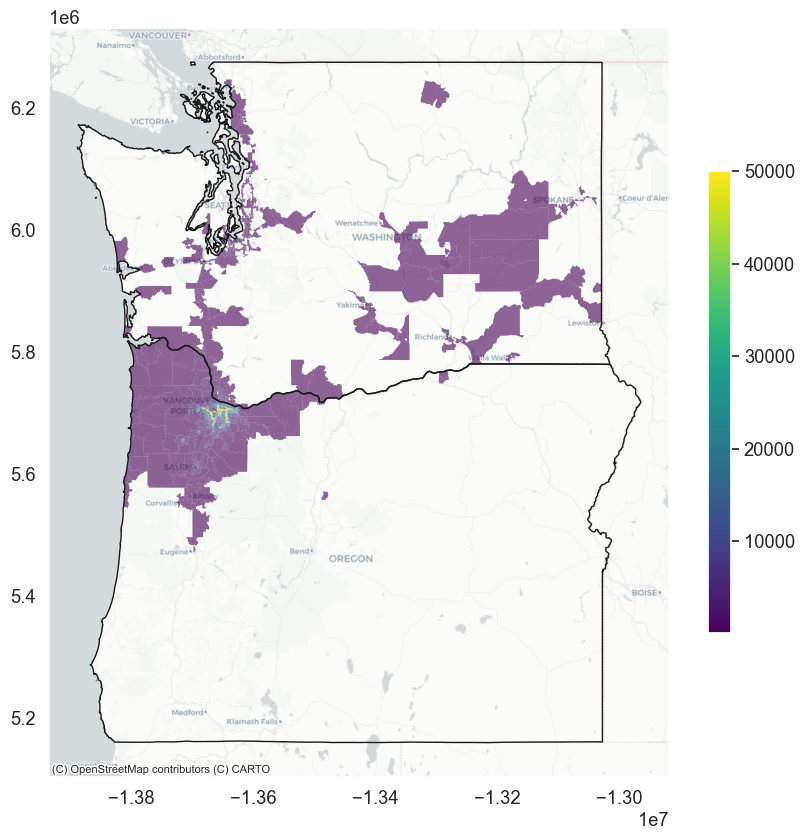

In [19]:
# Plot baseline EV adoption 
us_tracts_geojson['thru_GEOID'] = us_tracts_geojson['home_GEOID']
thru_vmt_to_plot = us_tracts_geojson.merge(EV_VMT_by_path_portland, 
                                            on = 'thru_GEOID',
                                            how = 'inner')

thru_vmt_to_plot.loc[:, 'VMT_per_sqkm'] =  \
thru_vmt_to_plot.loc[:, 'VMT']/ thru_vmt_to_plot.loc[:, 'ALAND'] * (10**6)
# tracts_with_EV_diff.loc[:, 'EV_fraction_diff'] *= 100
thru_vmt_to_plot = \
thru_vmt_to_plot.loc[thru_vmt_to_plot['VMT_per_sqkm']>10]
ax = thru_vmt_to_plot.plot(figsize = (10,12), 
                           column = 'VMT_per_sqkm', 
                           cmap='viridis',
                            alpha = 0.6, 
                           vmin = 10, vmax = 50000, 
                              linewidth=0.01, legend=True,
                                legend_kwds = {'shrink': 0.5})
# tracts_with_EV_diff.plot(ax = ax, facecolor = "none", 
#                          edgecolor='navy', lw=0.03)
state_boundary.plot(ax = ax, facecolor='none', edgecolor='k',linewidth = 1)
cx.add_basemap(ax, source = cx.providers.CartoDB.Positron)
# cx.add_basemap(ax, crs = tracts_with_EV_diff.crs.to_string(),
#                source = cx.providers.Stamen.TonerLite)
# cx.add_basemap(ax, crs = 'EPSG:4326', zoom =8,
#                source = cx.providers.Stamen.TonerLite)
ax.grid(False)
plt.savefig('Plot/report/vmt_by_thru_portland.png', dpi = 200)

In [14]:
group_var_h_inc = ['home_GEOID', 'populationGroupType']
EV_VMT_by_home_inc_portland = \
EV_VMT_by_scenario_portland.groupby(group_var_h_inc)[['VMT']].sum()
EV_VMT_by_home_inc_portland = EV_VMT_by_home_inc_portland.reset_index()
print(len(EV_VMT_by_home_inc_portland))
EV_VMT_by_home_inc_portland.head(5)

1146


,home_GEOID,populationGroupType,VMT
0,41005020100,high-income,22423.043802
1,41005020100,low-income,9632.084034
2,41005020100,medium-income,23586.709625
3,41005020200,high-income,58629.489564
4,41005020200,low-income,19039.151437


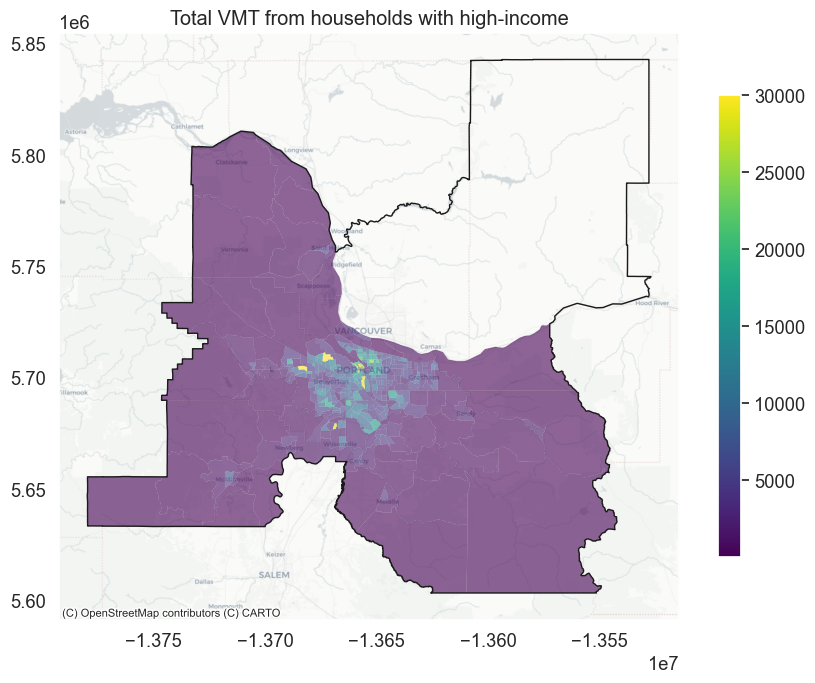

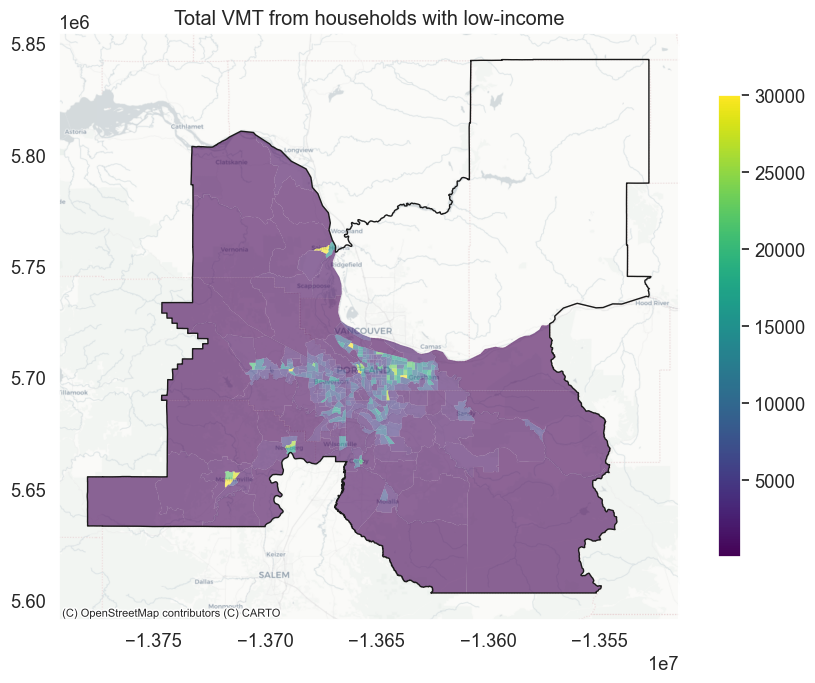

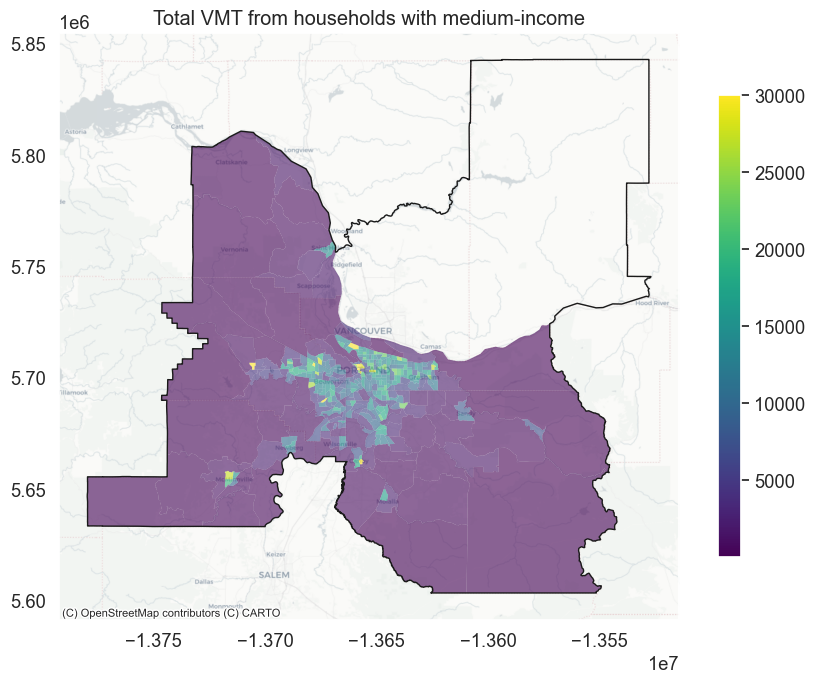

In [15]:
inc_level = EV_VMT_by_home_inc_portland.populationGroupType.unique()
for inc in inc_level:
    EV_VMT_selected = \
    EV_VMT_by_home_inc_portland.loc[EV_VMT_by_home_inc_portland['populationGroupType'] == inc]
    home_vmt_to_plot = us_tracts_geojson.merge(EV_VMT_selected, 
                                                on = 'home_GEOID',
                                                how = 'inner')
    home_vmt_to_plot.loc[:, 'VMT_per_sqkm'] =  \
    home_vmt_to_plot.loc[:, 'VMT']/ home_vmt_to_plot.loc[:, 'ALAND'] * (10**6)
    # tracts_with_EV_diff.loc[:, 'EV_fraction_diff'] *= 100
    ax = home_vmt_to_plot.plot(figsize = (10,12), 
                               column = 'VMT_per_sqkm', 
                               cmap='viridis',
                                alpha = 0.6, 
                               vmin = 1, vmax = 30000, 
                                  linewidth=0.01, legend=True,
                                    legend_kwds = {'shrink': 0.5})
    # tracts_with_EV_diff.plot(ax = ax, facecolor = "none", 
    #                          edgecolor='navy', lw=0.03)
    portland_boundary.plot(ax = ax, facecolor='none', edgecolor='k',linewidth = 1)
    cx.add_basemap(ax, source = cx.providers.CartoDB.Positron)
    # cx.add_basemap(ax, crs = tracts_with_EV_diff.crs.to_string(),
    #                source = cx.providers.Stamen.TonerLite)
    # cx.add_basemap(ax, crs = 'EPSG:4326', zoom =8,
    #                source = cx.providers.Stamen.TonerLite)
    ax.grid(False)
    plt.title('Total VMT from households with ' + inc)
    plt.savefig('Plot/report/vmt_by_home_portland_' + inc + '.png', dpi = 300)
    plt.show()

In [16]:
# through traffic
# EV_VMT_by_scenario_or = \
# EV_VMT_by_scenario_portland.loc[EV_VMT_by_scenario_portland['st_code'] == 'OR']
group_var_t_inc = ['thru_GEOID', 'populationGroupType']
EV_VMT_by_path_inc_portland = \
EV_VMT_by_scenario_portland.groupby(group_var_t_inc)[['VMT']].sum()
EV_VMT_by_path_inc_portland = EV_VMT_by_path_inc_portland.reset_index()
print(len(EV_VMT_by_path_inc_portland))
EV_VMT_by_path_inc_portland.head(5)

4769


,thru_GEOID,populationGroupType,VMT
0,16001002100,high-income,5.394193
1,16001002224,high-income,2.697096
2,16001010100,high-income,5.394193
3,16001010225,high-income,2.697096
4,16001010313,high-income,10.788386


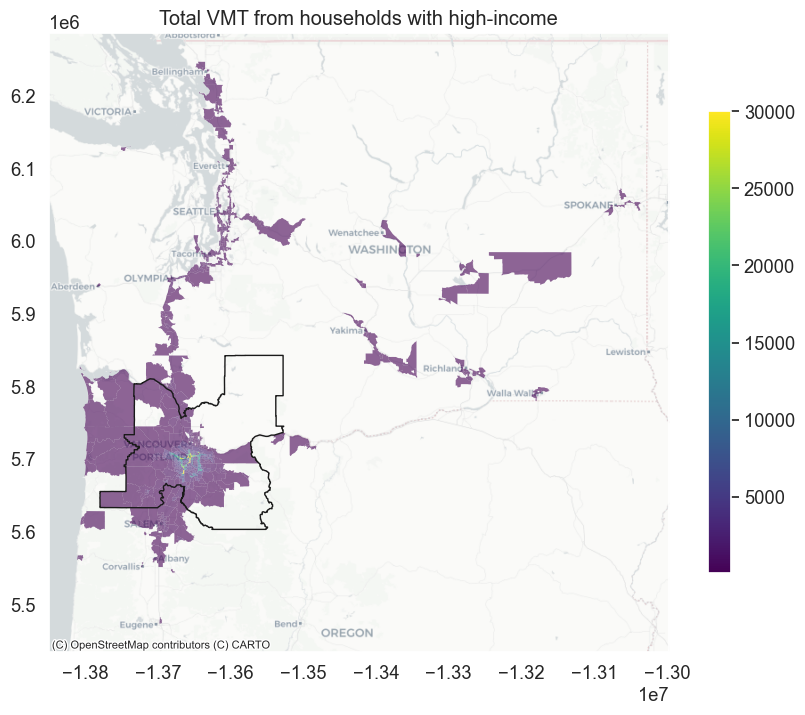

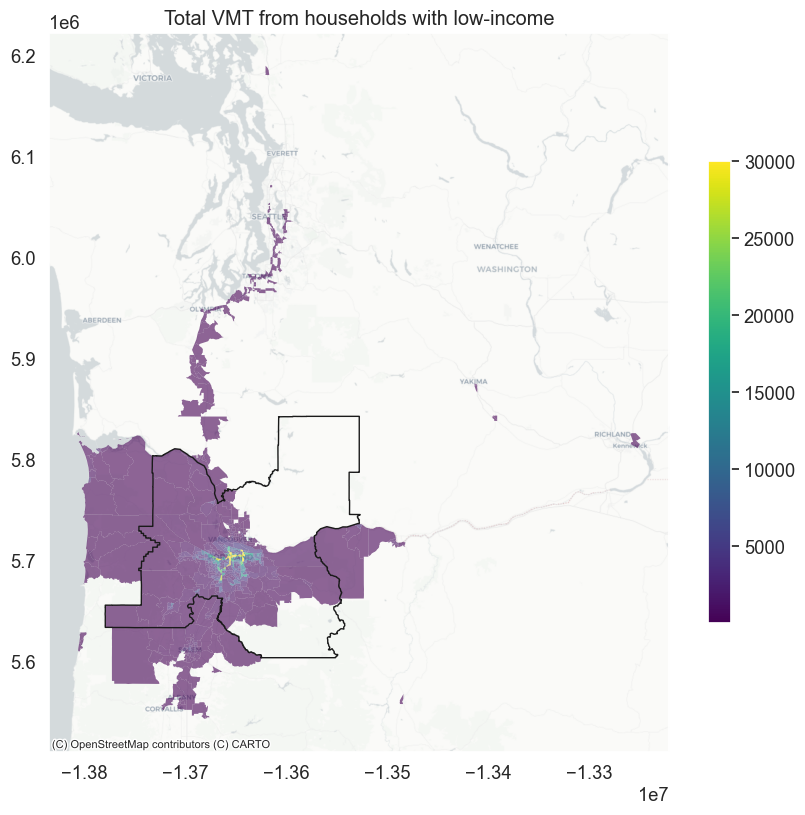

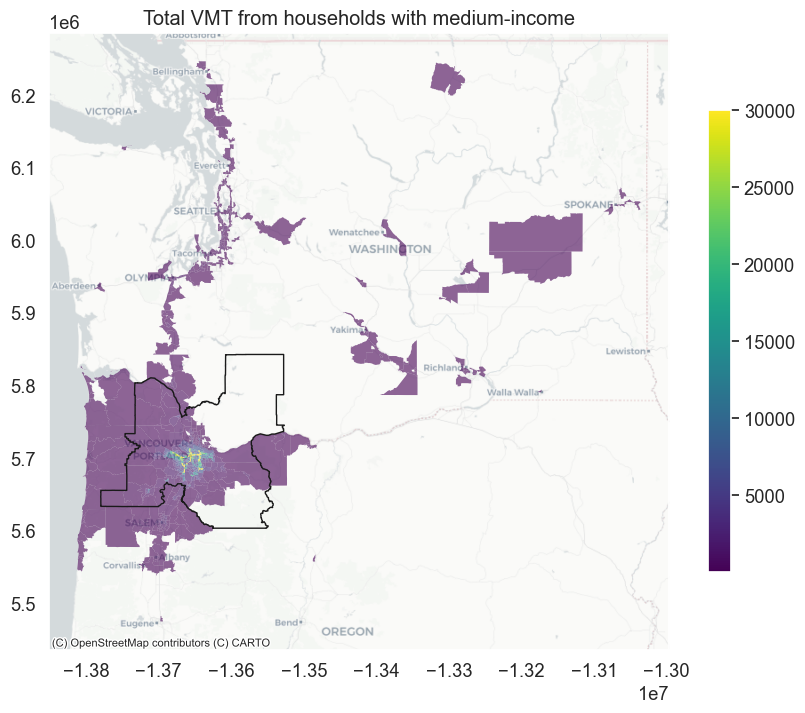

In [17]:
inc_level = EV_VMT_by_path_inc_portland.populationGroupType.unique()
for inc in inc_level:
    EV_VMT_selected = \
    EV_VMT_by_path_inc_portland.loc[EV_VMT_by_path_inc_portland['populationGroupType'] == inc]
    thru_vmt_to_plot = us_tracts_geojson.merge(EV_VMT_selected, 
                                                on = 'thru_GEOID',
                                                how = 'inner')
    thru_vmt_to_plot.loc[:, 'VMT_per_sqkm'] =  \
    thru_vmt_to_plot.loc[:, 'VMT']/ thru_vmt_to_plot.loc[:, 'ALAND'] * (10**6)
    thru_vmt_to_plot = \
    thru_vmt_to_plot.loc[thru_vmt_to_plot['VMT_per_sqkm']>10]
    # tracts_with_EV_diff.loc[:, 'EV_fraction_diff'] *= 100
    ax = thru_vmt_to_plot.plot(figsize = (10,12), 
                               column = 'VMT_per_sqkm', 
                               cmap='viridis',
                                alpha = 0.6, 
                               vmin = 10, vmax = 30000, 
                                  linewidth=0.01, legend=True,
                                    legend_kwds = {'shrink': 0.5})
    # tracts_with_EV_diff.plot(ax = ax, facecolor = "none", 
    #                          edgecolor='navy', lw=0.03)
    # OR_boundary = state_boundary.loc[state_boundary['STUSPS'] == 'OR']
    portland_boundary.plot(ax = ax, facecolor='none', edgecolor='k',linewidth = 1)
    cx.add_basemap(ax, source = cx.providers.CartoDB.Positron)
    # cx.add_basemap(ax, crs = tracts_with_EV_diff.crs.to_string(),
    #                source = cx.providers.Stamen.TonerLite)
    # cx.add_basemap(ax, crs = 'EPSG:4326', zoom =8,
    #                source = cx.providers.Stamen.TonerLite)
    ax.grid(False)
    plt.title('Total VMT from households with ' + inc)
    plt.savefig('Plot/report/vmt_by_thru_portland_' + inc + '.png', dpi = 300)
    plt.show()

## PART 2 -- generate summary statistics of total VMT

In [3]:
# Set part 2 environment
work_dir = '/Users/xiaodanxu/Library/CloudStorage/GoogleDrive-arielinseu@gmail.com/My Drive/GEMS/BILD-AQ/data'
os.chdir(work_dir)

In [12]:
# prepare input and parameters

selected_states = ['CA', 'OR', 'WA']
# scenario_name_lookup = {'Baseline': 'Baseline', 'NEVI': 'NEVI'} 
EV_VMT_by_state = None
# analysis_year = 2032
# scenarios = list(scenario_name_lookup.keys())
file_name = 'BILDAQ_VMT_by_tract_multistate_spillover.csv'
for selected_state in selected_states:
    vmt_dir = 'Output/' + selected_state
    ev_vmt = read_csv(vmt_dir + '/' + file_name)
    EV_VMT_by_state = pd.concat([EV_VMT_by_state, ev_vmt])
#     break
# print(EV_VMT_by_state.scenario.unique())
EV_VMT_by_state.head(5) 

,thru_GEOID,thru_geotype,thru_microtype,home_GEOID,home_geotype,home_microtype,populationGroupType,State,VMT
0,4001942600,C,6.0,6025010200,B,2,high-income,CA,0.878885
1,4001942600,C,6.0,6025010300,A,1,high-income,CA,0.878885
2,4001942600,C,6.0,6025010300,A,1,low-income,CA,0.878885
3,4001942600,C,6.0,6025010300,A,2,high-income,CA,3.076097
4,4001942600,C,6.0,6025010300,A,2,low-income,CA,0.878885


In [13]:
acs_households = read_csv('Input/ACS_household_by_tracts.csv')
acs_households_long = pd.melt(acs_households, id_vars= 'GEOID',
                              value_vars= ['low-income', 'medium-income', 'high-income'], 
                              var_name = 'populationGroupType',
                              value_name='ACS_hh')
acs_households_long.head(5)

,GEOID,populationGroupType,ACS_hh
0,1001020100,low-income,313
1,1001020200,low-income,497
2,1001020300,low-income,699
3,1001020400,low-income,728
4,1001020500,low-income,1519


In [14]:
micro_geotype_lookup = read_csv('ccst_geoid_key_tranps_geo_with_imputation.csv')
micro_geotype_lookup = micro_geotype_lookup[['GEOID', 'microtype', 'geotype']]
micro_geotype_lookup.columns = ['home_GEOID', 'home_microtype', 'home_geotype']
EV_VMT_by_state = EV_VMT_by_state.drop(columns = ['home_geotype', 'home_microtype'])

EV_VMT_by_state = pd.merge(EV_VMT_by_state, micro_geotype_lookup,
                           on = 'home_GEOID',
                           how = 'left')
print(len(EV_VMT_by_state))
EV_VMT_by_state.head(5)

18865795


,thru_GEOID,thru_geotype,thru_microtype,home_GEOID,populationGroupType,State,VMT,home_microtype,home_geotype
0,4001942600,C,6.0,6025010200,high-income,CA,0.878885,6,B
1,4001942600,C,6.0,6025010300,high-income,CA,0.878885,6,B
2,4001942600,C,6.0,6025010300,low-income,CA,0.878885,6,B
3,4001942600,C,6.0,6025010300,high-income,CA,3.076097,6,B
4,4001942600,C,6.0,6025010300,low-income,CA,0.878885,6,B


In [15]:
# combine VMT and hh
print(len(EV_VMT_by_state))

group_var = ['State', 'home_GEOID', 'home_geotype', 'home_microtype', 'populationGroupType']
EV_VMT_by_home = \
EV_VMT_by_state.groupby(group_var)[['VMT']].sum()
EV_VMT_by_home = EV_VMT_by_home.reset_index()
print(len(EV_VMT_by_home))

EV_VMT_by_home = pd.merge(EV_VMT_by_home, acs_households_long,
                           left_on = ['home_GEOID', 'populationGroupType'],
                           right_on = ['GEOID', 'populationGroupType'],
                           how = 'left')
print(len(EV_VMT_by_home))
EV_VMT_by_home.head(5)

18865795
30644
30644


,State,home_GEOID,home_geotype,home_microtype,populationGroupType,VMT,GEOID,ACS_hh
0,CA,6001400100,A,5,high-income,35636.163429,6001400100,823
1,CA,6001400100,A,5,low-income,6093.171296,6001400100,180
2,CA,6001400100,A,5,medium-income,11011.692218,6001400100,251
3,CA,6001400200,A,2,high-income,12632.500170,6001400200,449
4,CA,6001400200,A,2,low-income,1325.146913,6001400200,76


In [30]:
# results by income group
order_lookup = {'low-income': 1, 'medium-income': 2, 'high-income': 3}

summary_by_inc_group = \
EV_VMT_by_home.groupby(['State', 'populationGroupType'])[['VMT', 'ACS_hh']].sum()

summary_by_inc_group = summary_by_inc_group.reset_index()
summary_by_inc_group.loc[:, 'VMT_per_hh'] = \
summary_by_inc_group.loc[:, 'VMT'] / summary_by_inc_group.loc[:, 'ACS_hh']
summary_by_inc_group.loc[:, 'inc_rank'] = \
summary_by_inc_group.loc[:, 'populationGroupType'].map(order_lookup)
summary_by_inc_group = summary_by_inc_group.sort_values(by = 'inc_rank')
summary_by_inc_group.head(5)

,State,populationGroupType,VMT,ACS_hh,VMT_per_hh,inc_rank
1,CA,low-income,2.455013e+08,4932095,49.776263,1
4,OR,low-income,2.506643e+07,700771,35.769782,1
7,WA,low-income,4.103040e+07,1008172,40.697818,1
2,CA,medium-income,3.254441e+08,4869250,66.836599,2
5,OR,medium-income,3.339146e+07,631122,52.908098,2


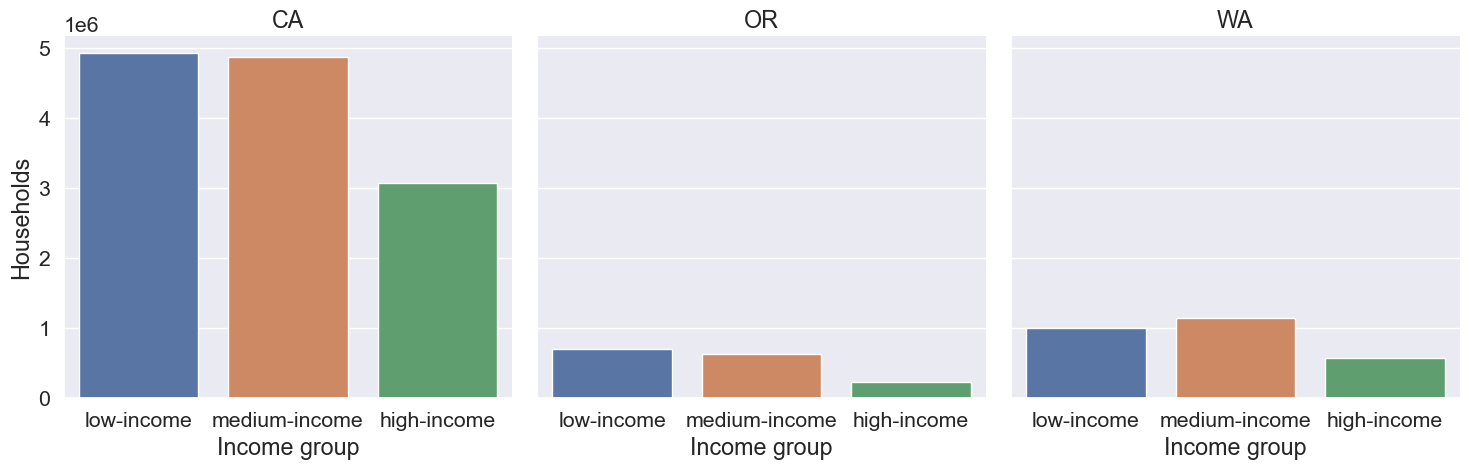

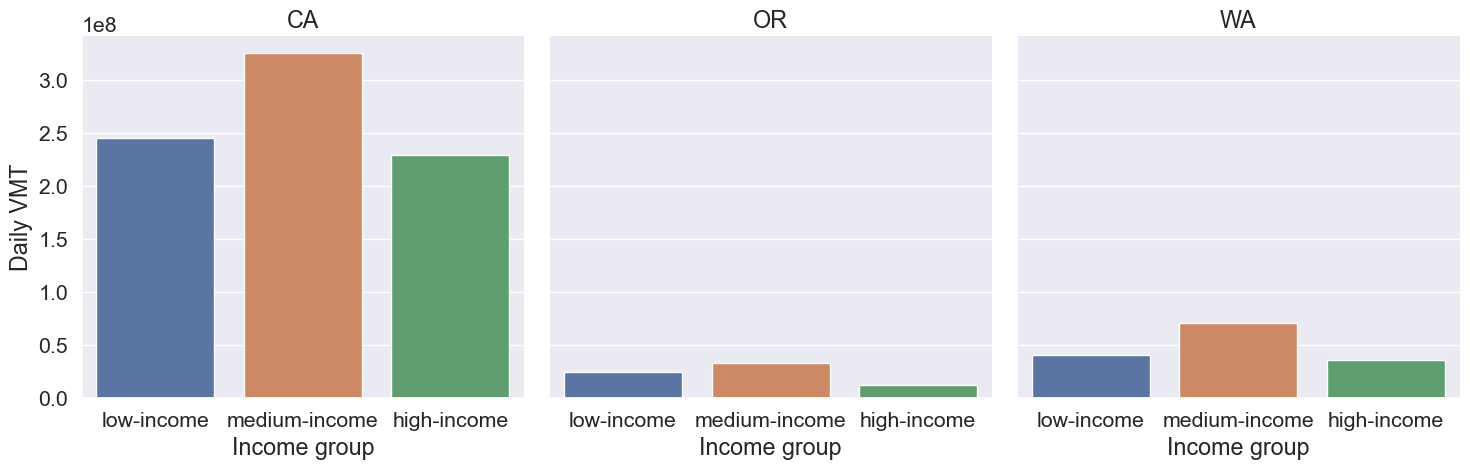

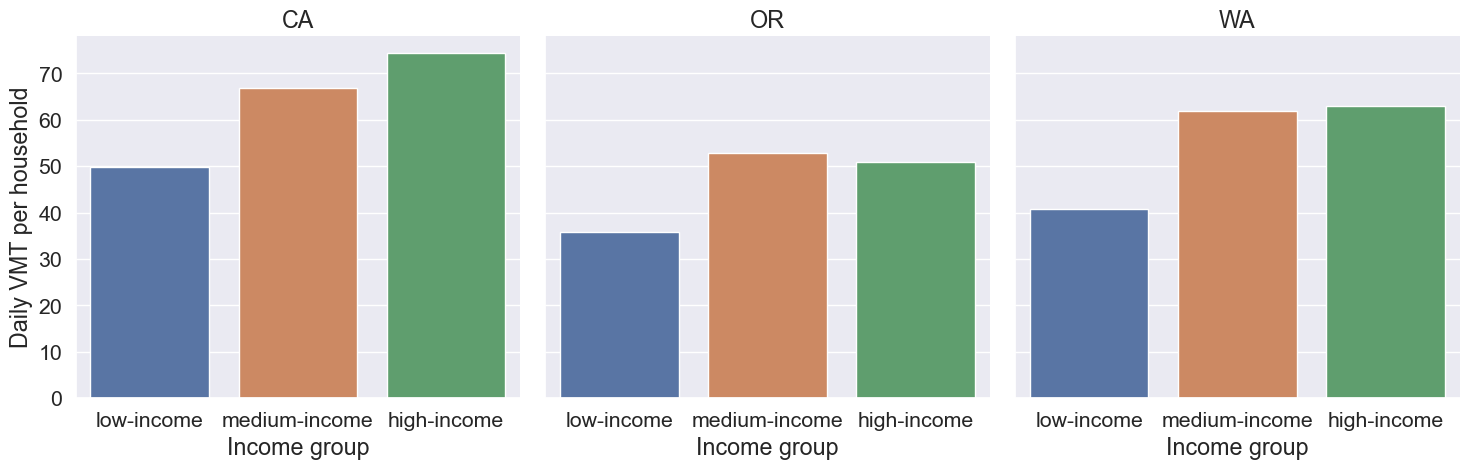

In [31]:
# plot by income group
sns.set_theme(font_scale=1.4)
ax = sns.catplot(summary_by_inc_group, x = 'populationGroupType',
           y = 'ACS_hh', col = 'State', kind = 'bar')
ax.set_titles("{col_name}")
ax.set_axis_labels("Income group","Households")
plt.savefig('Plot/Report/hh_by_inc.png', dpi = 300, bbox_inches = 'tight')
plt.show()

ax = sns.catplot(summary_by_inc_group, x = 'populationGroupType',
           y = 'VMT', col = 'State', kind = 'bar')
ax.set_titles("{col_name}")
ax.set_axis_labels("Income group","Daily VMT")
plt.savefig('Plot/Report/VMT_by_inc.png', dpi = 300, bbox_inches = 'tight')

ax = sns.catplot(summary_by_inc_group, x = 'populationGroupType',
           y = 'VMT_per_hh', col = 'State', kind = 'bar')
ax.set_titles("{col_name}")
ax.set_axis_labels("Income group","Daily VMT per household")
plt.savefig('Plot/Report/VMT_per_hh_by_inc.png', dpi = 300, bbox_inches = 'tight')



In [33]:
# results by home micro-geotype
order_lookup = {'low-income': 1, 'medium-income': 2, 'high-income': 3}
grouping_var = ['home_geotype', 'home_microtype', 'populationGroupType']
EV_VMT_by_home_typology = \
EV_VMT_by_home.groupby(grouping_var)[['VMT', 'ACS_hh']].sum()

EV_VMT_by_home_typology = EV_VMT_by_home_typology.reset_index()
EV_VMT_by_home_typology.loc[:, 'VMT_per_hh'] = \
EV_VMT_by_home_typology.loc[:, 'VMT'] / EV_VMT_by_home_typology.loc[:, 'ACS_hh']
EV_VMT_by_home_typology.loc[:, 'inc_rank'] = \
EV_VMT_by_home_typology.loc[:, 'populationGroupType'].map(order_lookup)
EV_VMT_by_home_typology = EV_VMT_by_home_typology.sort_values(by = 'inc_rank')
EV_VMT_by_home_typology.head(5)

EV_VMT_by_home_typology = EV_VMT_by_home_typology.sort_values(by = 'home_geotype')
EV_VMT_by_home_typology = \
EV_VMT_by_home_typology.rename(columns = {'populationGroupType': 'income group'})
EV_VMT_by_home_typology.head(5)

,home_geotype,home_microtype,income group,VMT,ACS_hh,VMT_per_hh,inc_rank
0,A,1,high-income,1.749256e+07,509180,34.354379,3
17,A,6,medium-income,1.433222e+05,1697,84.456218,2
14,A,5,medium-income,2.533853e+07,282194,89.791164,2
11,A,4,medium-income,8.144880e+06,87126,93.483919,2
8,A,3,medium-income,3.862620e+07,608775,63.449065,2


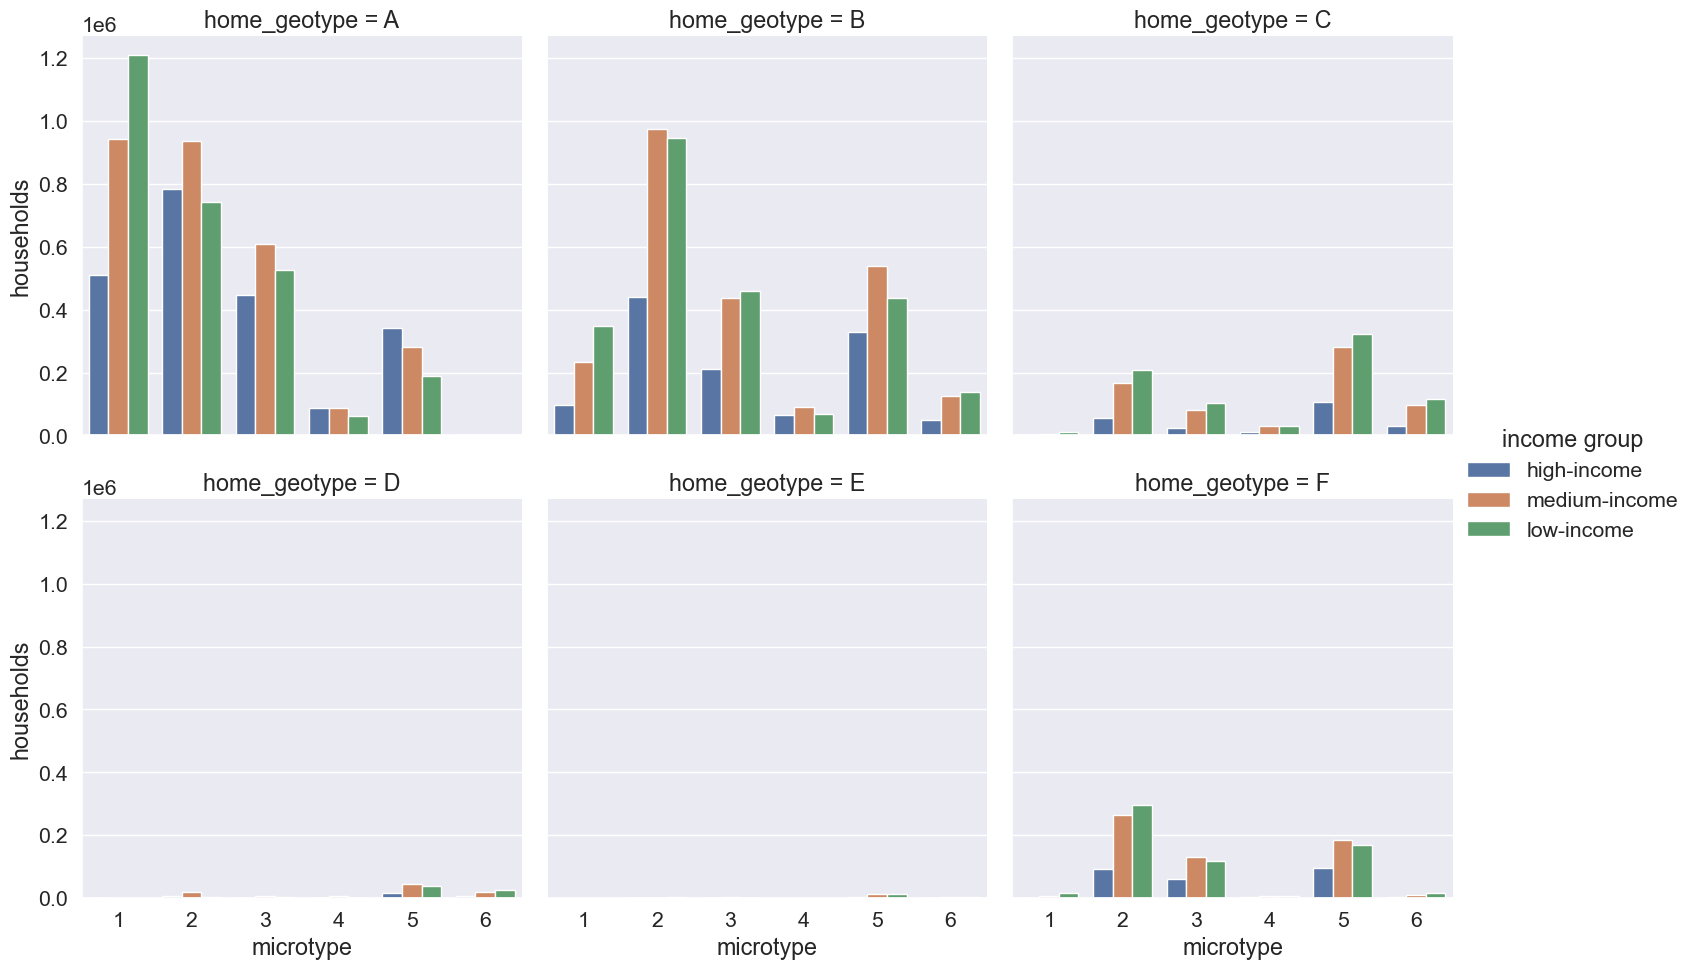

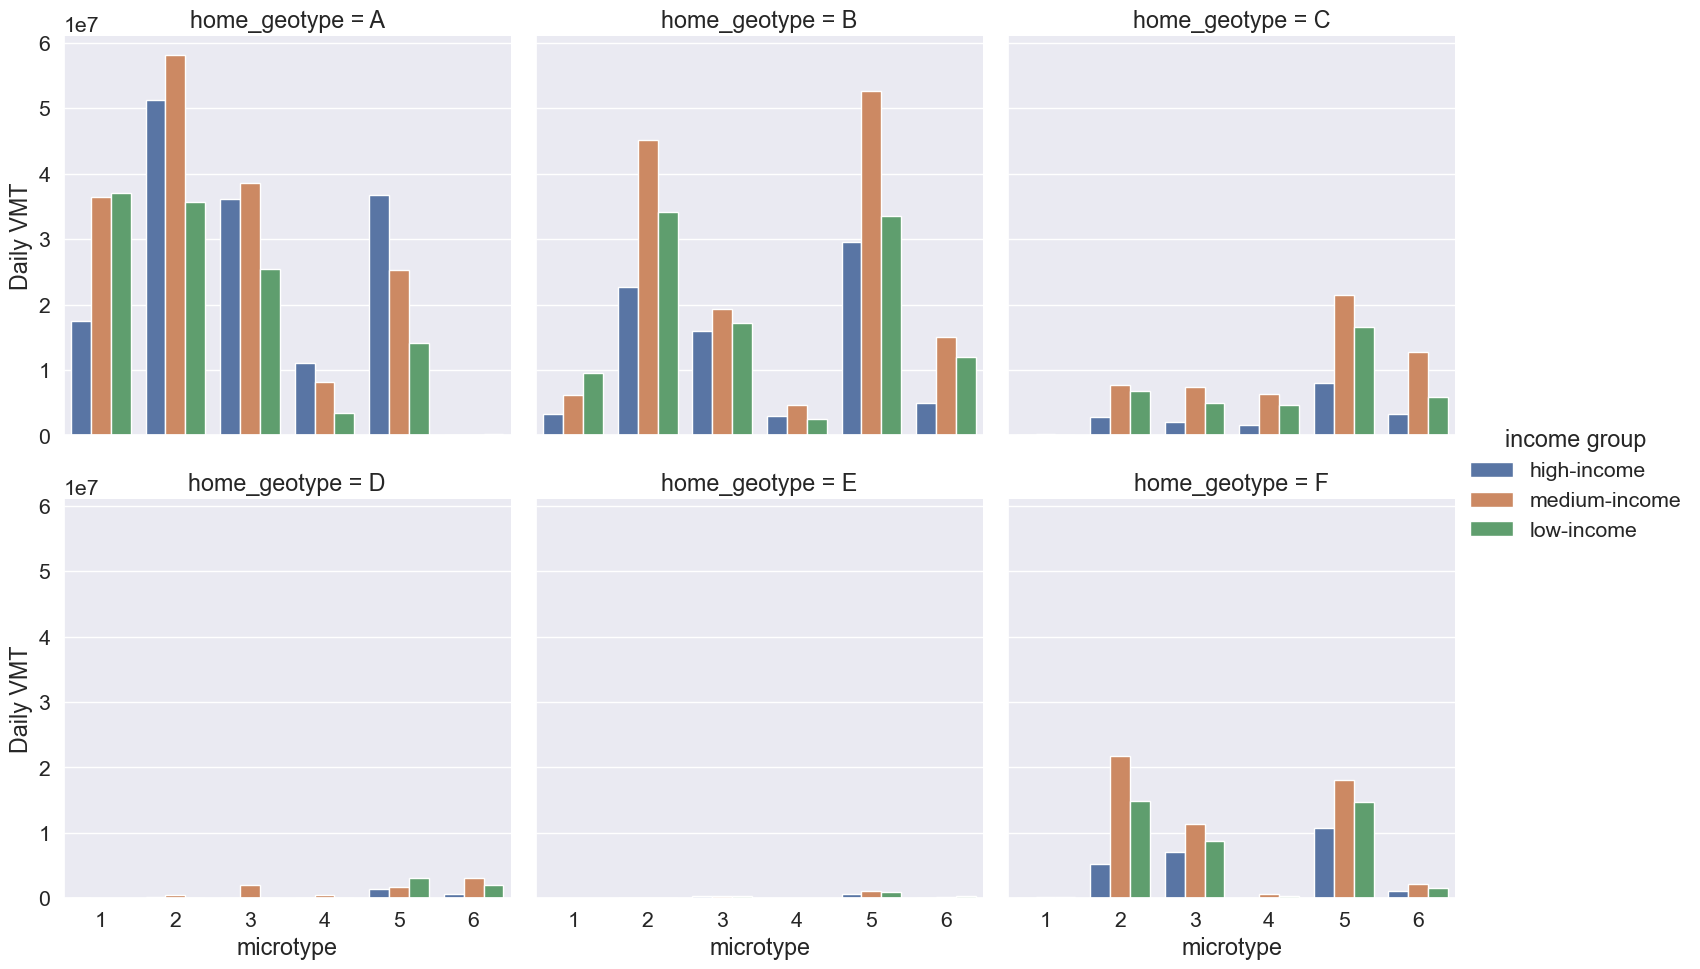

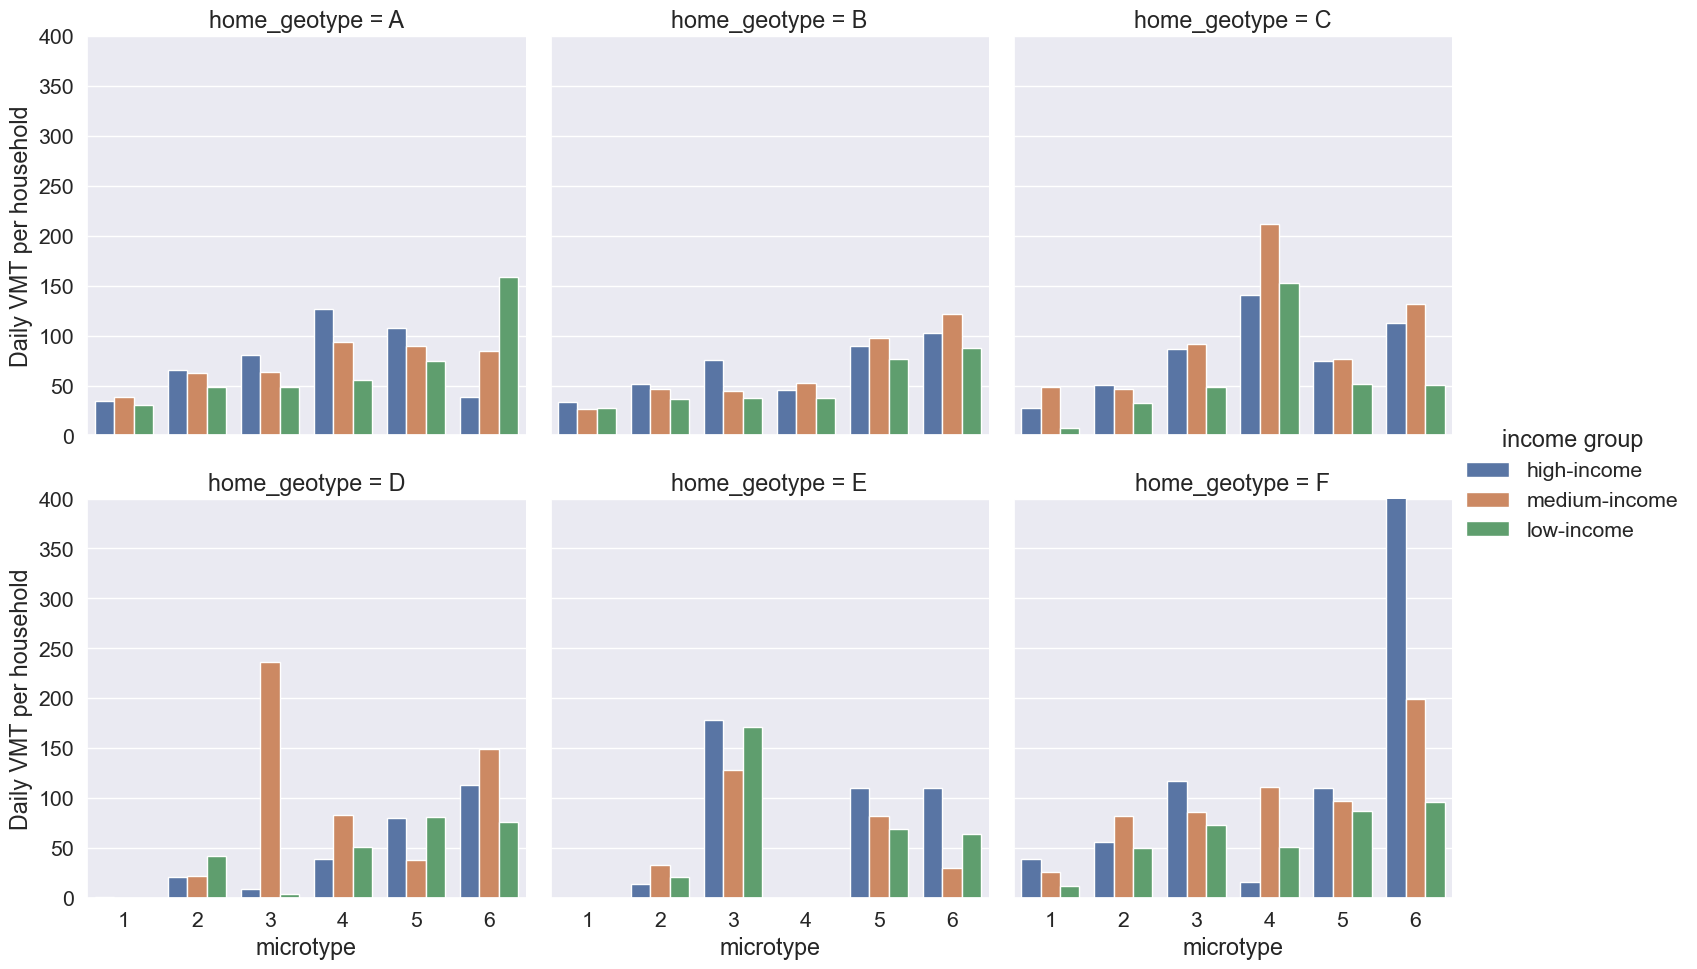

In [34]:
# plot by income group
sns.set_theme(font_scale=1.4)
ax = sns.catplot(EV_VMT_by_home_typology, x = 'home_microtype',
                 y = 'ACS_hh', hue = 'income group',
                 col = 'home_geotype', col_wrap = 3, kind = 'bar')
# ax.set_titles("geotype = {col_name}")
ax.set_axis_labels("microtype", "households")
# plt.legend(title='income group')
plt.savefig('Plot/Report/hh_by_inc_typology.png', dpi = 300, bbox_inches = 'tight')
plt.show()

ax = sns.catplot(EV_VMT_by_home_typology, x = 'home_microtype',
                 y = 'VMT', hue = 'income group',
                 col = 'home_geotype', col_wrap = 3, kind = 'bar')
# ax.set_titles("geotype = {col_name}")
ax.set_axis_labels("microtype","Daily VMT")
# plt.legend(title='income group')
plt.savefig('Plot/Report/VMT_by_inc_typology.png', dpi = 300, bbox_inches = 'tight')

ax = sns.catplot(EV_VMT_by_home_typology, x = 'home_microtype',
                 y = 'VMT_per_hh', hue = 'income group',
                 col = 'home_geotype', col_wrap = 3,  kind = 'bar')
# ax.set_titles("geotype = {col_name}")
ax.set_axis_labels("microtype", "Daily VMT per household")
ax.set(ylim=(0, 400))
# plt.legend(title='income group')
plt.savefig('Plot/Report/VMT_per_hh_by_inc_typology.png', dpi = 300, 
            bbox_inches = 'tight')

In [35]:
# # results by thru micro-geotype
order_lookup = {'low-income': 1, 'medium-income': 2, 'high-income': 3}
grouping_var = ['thru_geotype', 'thru_microtype', 'populationGroupType']
EV_VMT_by_thru_typology = \
EV_VMT_by_state.groupby(grouping_var)[['VMT']].sum()

EV_VMT_by_thru_typology = EV_VMT_by_thru_typology.reset_index()

EV_VMT_by_thru_typology.loc[:, 'inc_rank'] = \
EV_VMT_by_thru_typology.loc[:, 'populationGroupType'].map(order_lookup)
EV_VMT_by_thru_typology = EV_VMT_by_thru_typology.sort_values(by = 'inc_rank')
EV_VMT_by_thru_typology.head(5)

EV_VMT_by_thru_typology = EV_VMT_by_thru_typology.sort_values(by = 'thru_geotype')
EV_VMT_by_thru_typology = \
EV_VMT_by_thru_typology.rename(columns = {'populationGroupType': 'income group'})
EV_VMT_by_thru_typology.head(5)

,thru_geotype,thru_microtype,income group,VMT,inc_rank
0,A,1.0,high-income,2.074181e+07,3
1,A,1.0,low-income,2.615686e+07,1
13,A,5.0,low-income,1.131441e+07,1
4,A,2.0,low-income,1.900791e+07,1
10,A,4.0,low-income,3.052276e+06,1


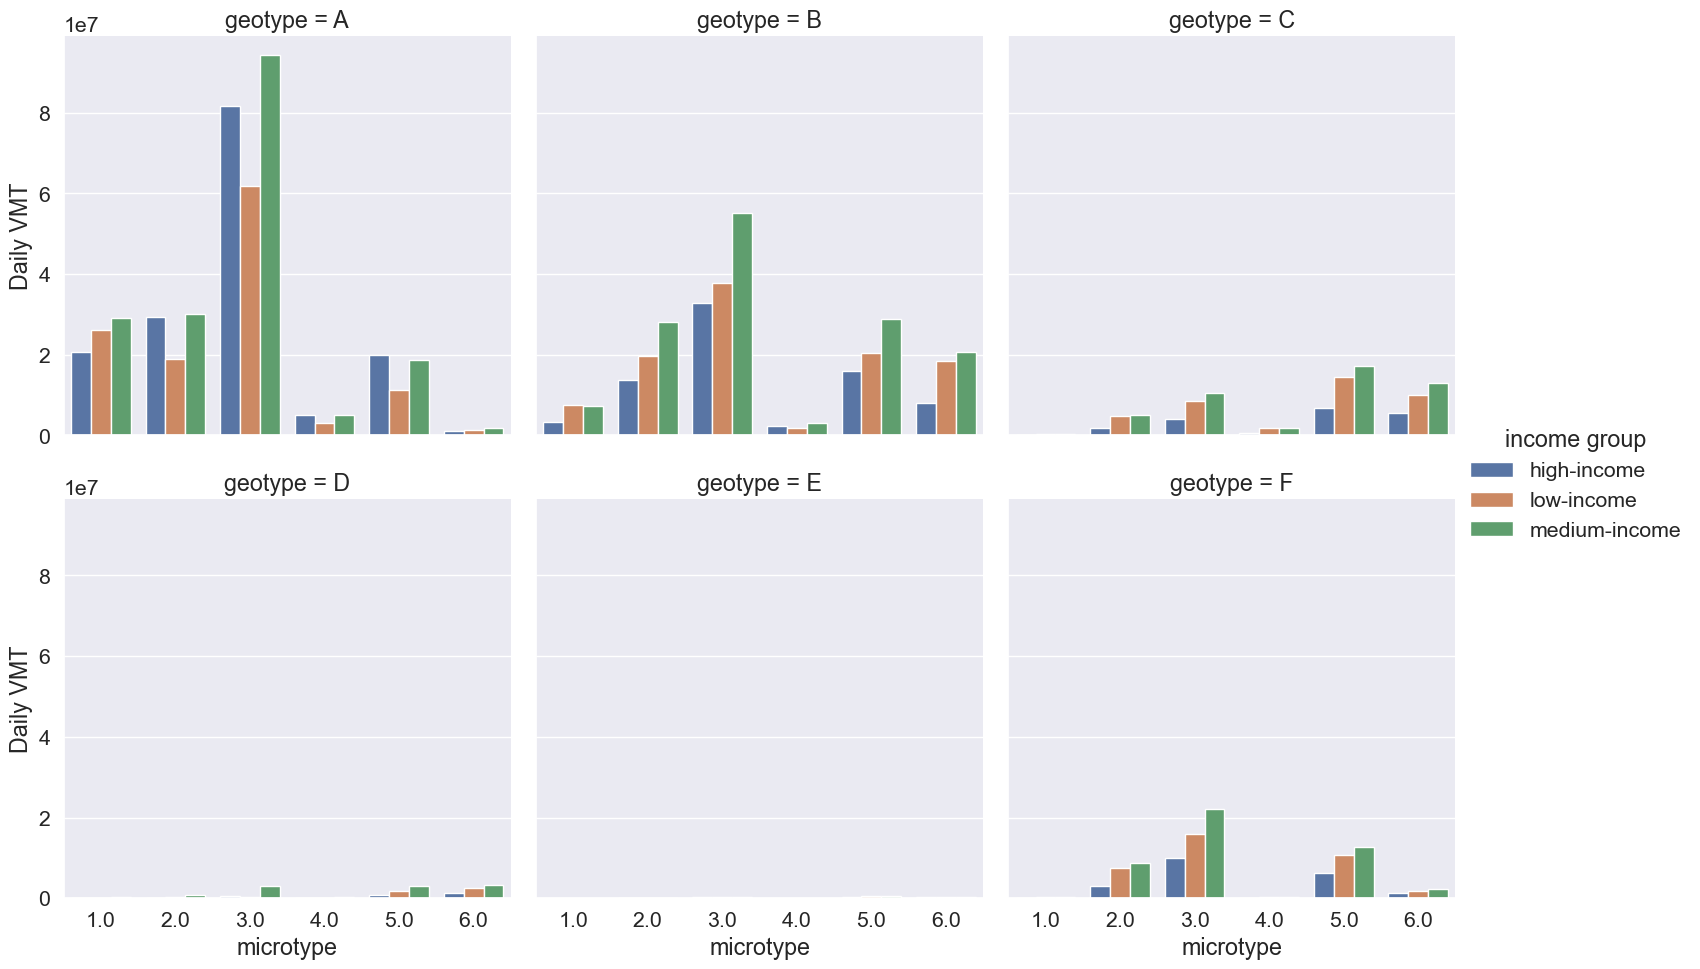

In [36]:
ax = sns.catplot(EV_VMT_by_thru_typology, x = 'thru_microtype',
                 y = 'VMT', hue = 'income group',
                 col = 'thru_geotype', col_wrap = 3, kind = 'bar')
ax.set_titles("geotype = {col_name}")
ax.set_axis_labels("microtype","Daily VMT")
# plt.legend(title='income group')
plt.savefig('Plot/Report/VMT_by_thru_inc_typology.png', dpi = 300, bbox_inches = 'tight')